# Finger 1

## Comienzo haciendo una vista de una muestra de datos y estadisticas generales del set de datos

In [110]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data_eventos = pd.read_csv('events.csv',low_memory = False)
data_eventos.head()

,timestamp,event,person,url,sku,model,condition,storage,color,skus,...,search_engine,channel,new_vs_returning,city,region,country,device_type,screen_resolution,operating_system_version,browser_version
0,2018-05-31 23:38:05,ad campaign hit,0004b0a2,/comprar/iphone/iphone-5s,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2018-05-31 23:38:05,visited site,0004b0a2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,Paid,New,Camaragibe,Pernambuco,Brazil,Smartphone,360x640,Android 6,Chrome Mobile 39
2,2018-05-31 23:38:09,viewed product,0004b0a2,NaN,2694.0,iPhone 5s,Bom,32GB,Cinza espacial,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2018-05-31 23:38:40,checkout,0004b0a2,NaN,2694.0,iPhone 5s,Bom,32GB,Cinza espacial,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2018-05-29 13:29:25,viewed product,0006a21a,NaN,15338.0,Samsung Galaxy S8,Bom,64GB,Dourado,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [111]:
data_eventos.describe()

,timestamp,event,person,url,sku,model,condition,storage,color,skus,...,search_engine,channel,new_vs_returning,city,region,country,device_type,screen_resolution,operating_system_version,browser_version
count,1011288,1011288,1011288,82756,563838,564284,563836,563836,563836,221699,...,50957,87378,87378,87378,87378,87378,87378,87378,87378,87378
unique,793805,11,27624,227,3574,202,5,8,63,35310,...,4,7,2,1939,93,46,4,282,121,343
top,2018-05-15 15:56:06,viewed product,71492f2b,/,2830.0,iPhone 6,Bom,16GB,Preto,"2820,6706,6720,2750,6649,7251,6663,12604,7224,...",...,Google,Paid,Returning,Unknown,Sao Paulo,Brazil,Smartphone,360x640,Windows 7,Chrome 66.0
freq,11,528931,2771,28323,4282,50916,243014,190833,132960,594,...,50240,44193,60480,15819,24996,84308,44239,30009,19675,22611


## Ejercicio 1: Analizar cuál es el tipo de evento predominante en el set de datos. 

In [112]:
eventos = data_eventos['event'].value_counts().to_frame()
eventos

,event
viewed product,528931
brand listing,98635
visited site,87378
ad campaign hit,82827
generic listing,67534
searched products,56073
search engine hit,50957
checkout,33735
staticpage,3598
conversion,1172


Text(0,0.5,'Cantidad de apariciones')

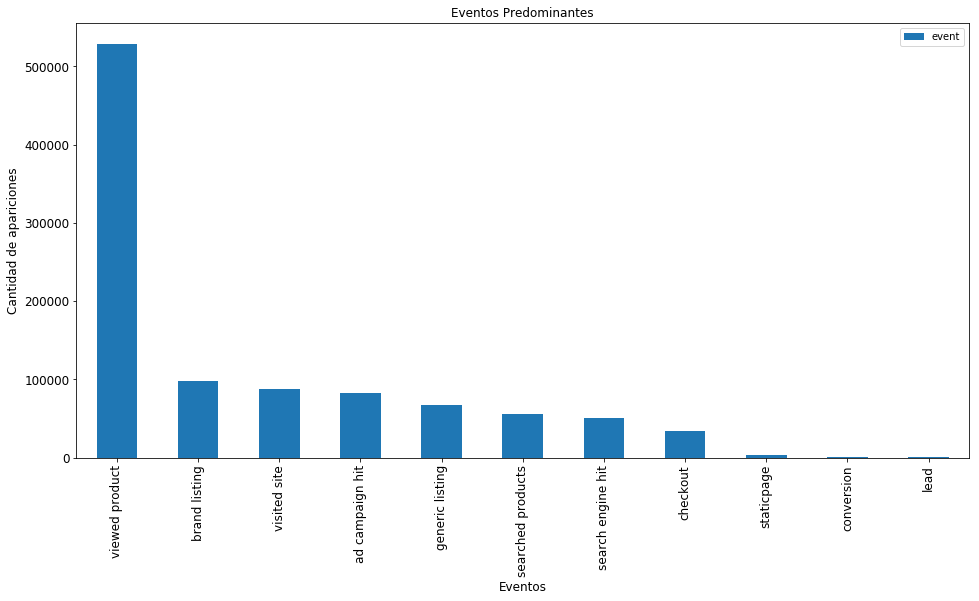

In [113]:
eventos.plot(kind = 'bar', figsize = (16, 8), title = 'Eventos Predominantes', fontsize = 12)
ax = plt.gca()
ax.set_xlabel("Eventos",fontsize = 12)
ax.set_ylabel("Cantidad de apariciones", fontsize = 12)

El evento predominante es 'viewed product'

## Ejercicio 2: Calcular cuales son los 5 productos (identificados por sku) con mayor cantidad de conversiones.

In [114]:
productos_comprados = data_eventos.loc[data_eventos['event'] == 'conversion',['sku','model','condition','storage','color']]
productos_comprados['descripcion'] = productos_comprados['sku']+'-'+productos_comprados['model'] + ' '+productos_comprados['condition'] +' '+ productos_comprados['storage'] + ' ' + productos_comprados['color']
productos_comprados = productos_comprados['descripcion'].value_counts()
cinco_mas_comprados = productos_comprados.head().to_frame()
cinco_mas_comprados


,descripcion
6371.0-Samsung Galaxy J5 Bom 16GB Dourado,30
6370.0-Samsung Galaxy J5 Muito Bom 16GB Dourado,18
7631.0-Motorola Moto G3 4G Bom 16GB Preto,17
2692.0-iPhone 5s Bom 16GB Cinza espacial,16
3371.0-Samsung Galaxy S6 Flat Bom 32GB Dourado,14


Text(0,0.5,'Productos')

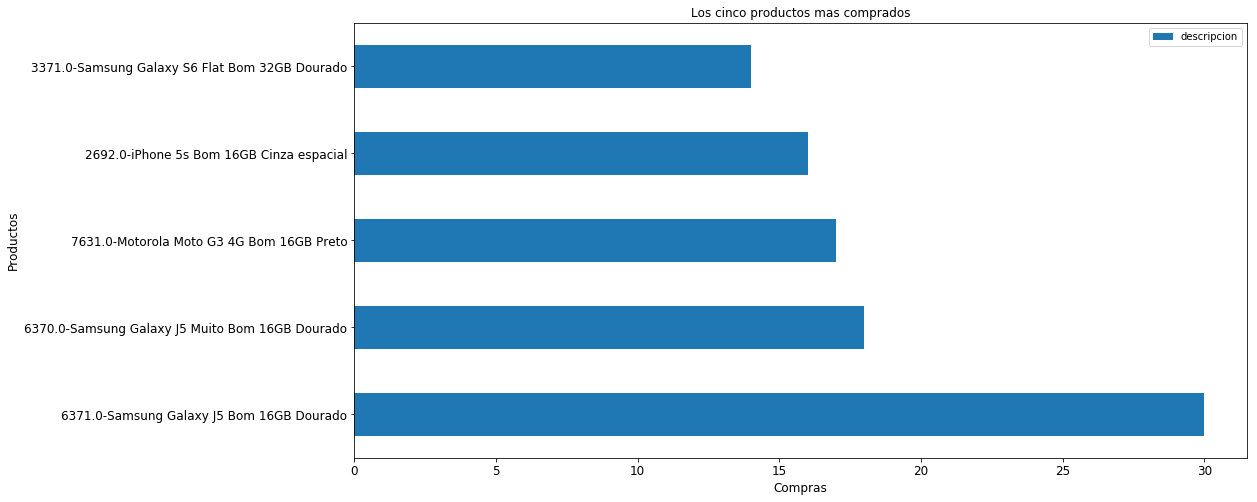

In [115]:
cinco_mas_comprados.plot(kind = 'barh', figsize = (16, 8), title = 'Los cinco productos mas comprados', fontsize = 12)
ax = plt.gca()
ax.set_xlabel("Compras",fontsize = 12)
ax.set_ylabel("Productos", fontsize = 12)

## Ejercicio 3: Averiguar cuáles son los 10 usuarios que registraron más actividad en la plataforma (es decir, realizaron más eventos).

In [116]:
usuarios = data_eventos['person'].value_counts()
diez_mas_activos = usuarios.head(10).to_frame()
diez_mas_activos

,person
71492f2b,2771
6b07be7b,2770
285101a1,2140
3e34b3cf,1877
2d5a84c1,1800
5f25cb5d,1797
5af7e2bc,1773
3b5a5833,1705
d7e60792,1352
cd6e0b8d,1254


Text(0,0.5,'Cantidad de eventos')

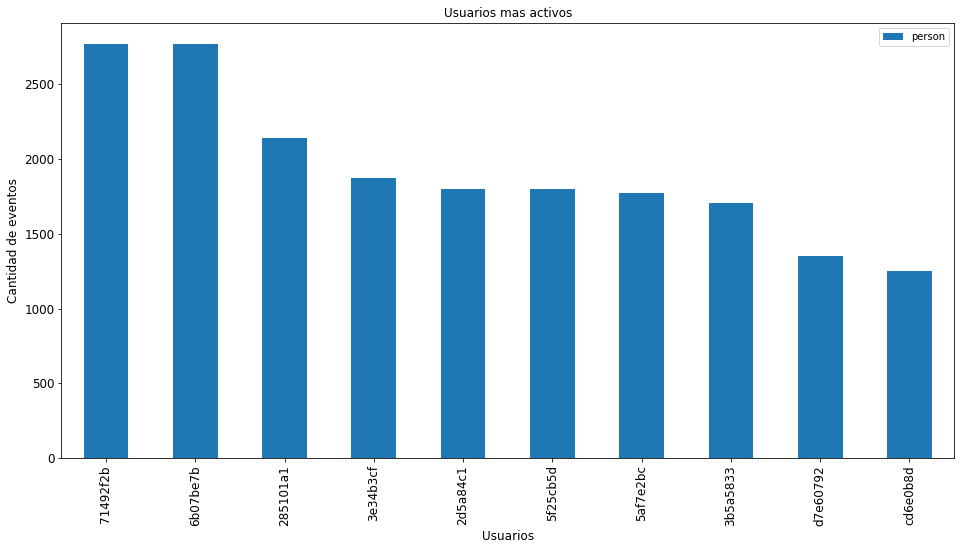

In [117]:
diez_mas_activos.plot(kind = 'bar', figsize = (16, 8), title = 'Usuarios mas activos', fontsize = 12)
ax = plt.gca()
ax.set_xlabel("Usuarios",fontsize = 12)
ax.set_ylabel("Cantidad de eventos", fontsize = 12)